In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
l = 1
g = 9.81

def f(t,phi):
    phi0 = phi[0]
    phi1 = phi[1]
    return np.array([phi1, -g/l*np.sin(phi0)])

def df(t,phi):
    phi0 = phi[0]
    phi1 = phi[1]
    return np.array([[0,1],[-g/l*np.cos(phi0),0]])

phiA = 3
phi0 = np.array([phiA,0], dtype=float)

In [3]:
def eulerVerfahren(T,phi0,dt,f):
    ti = [0]
    phi = [phi0]
    while ti[-1] < T-dt/2:
        r1 = f(ti[-1],phi[-1])
        phi.append(phi[-1]+dt*r1)
        ti.append(ti[-1]+dt)
    return np.array(ti), np.array(phi)

In [4]:
ti, phi = eulerVerfahren(10,phi0,0.0001,f)

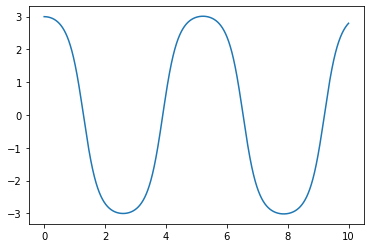

In [5]:
plt.plot(ti,phi[:,0])

In [6]:
from scipy.linalg import lu, solve_triangular

In [7]:
def impliziteulerVerfahren(T,phi0,dt,f,df):
    ti = [0]
    phi = [phi0]
    ids = np.eye(phi0.shape[0])
        
    # Verfahrensfunktion für implizit Euler
    def G(s, tk, phik):
        return s-f(tk+dt,phik+dt*s)

    # Partielle Ableitung nach s der Verfahrensfunktion
    def dG(s, tk, phik):
        return ids-df(tk+dt,phik+dt*s)*dt

    def newton(s, tk, phik, tol=1e-12, maxIter=20):
        k = 0
        delta = 10*tol*np.ones(phik.shape[0])
        while np.linalg.norm(delta,np.inf) > tol and k < maxIter:
            b = G(s,tk,phik)
            A = dG(s,tk,phik)
            p,l,u = lu(A)
            z = solve_triangular(l,p.T@b,lower=False)
            delta = solve_triangular(u,z,lower=True)
            s -= delta
            k += 1
        return s
    
    s = f(ti[-1],phi[-1])
    while ti[-1] < T-dt/2:
        r1 = newton(s, ti[-1], phi[-1])
        phi.append(phi[-1]+dt*r1)
        ti.append(ti[-1]+dt)
    return np.array(ti), np.array(phi)

In [8]:
def trapezVerfahren(T,phi0,dt,f,df):
    ti = [0]
    phi = [phi0]
    ids = np.eye(phi0.shape[0])
        
    # Verfahrensfunktion für implizit Trapezmethode
    def G(s, tk, phik):
        r1 = f(tk,phik)
        return s-f(tk+dt,phik+dt/2*r1+dt/2*s)

    # Partielle Ableitung nach s der Verfahrensfunktion
    def dG(s, tk, phik):
        r1 = f(tk,phik)
        return ids-df(tk+dt,phik+dt/2*r1+dt/2*s)*dt/2

    def newton(s, tk, phik, tol=1e-12, maxIter=20):
        k = 0
        delta = 10*tol*np.ones(phik.shape[0])
        while np.linalg.norm(delta,np.inf) > tol and k < maxIter:
            b = G(s,tk,phik)
            A = dG(s,tk,phik)
            p,l,u = lu(A)
            z = solve_triangular(l,p.T@b,lower=False)
            delta = solve_triangular(u,z,lower=True)
            s -= delta
            k += 1
        return s
    
    s = f(ti[-1],phi[-1])
    while ti[-1] < T-dt/2:
        r1 = f(ti[-1],phi[-1])
        r2 = newton(s, ti[-1], phi[-1])
        phi.append(phi[-1]+dt/2*r1+dt/2*r2)
        ti.append(ti[-1]+dt)
    return np.array(ti), np.array(phi)

In [9]:
ti_i, phi_i = impliziteulerVerfahren(10,phi0,0.01,f,df)

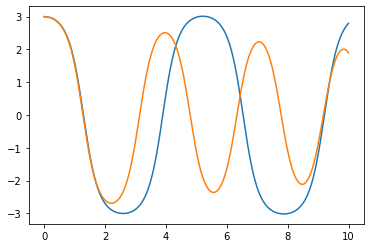

In [10]:
plt.plot(ti,phi[:,0])
plt.plot(ti_i,phi_i[:,0])

In [11]:
ti_e, phi_e = eulerVerfahren(10,phi0,0.0004,f)

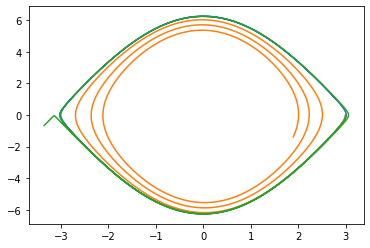

In [12]:
plt.plot(phi[:,0],phi[:,1])
plt.plot(phi_i[:,0],phi_i[:,1])
plt.plot(phi_e[:,0],phi_e[:,1])

In [13]:
def f(t,phi):
    x = phi[0]
    y = phi[1]
    return np.array([y, -x])

def df(t,phi):
    x = phi[0]
    y = phi[1]
    return np.array([[0,1],[-1,0]])

phi0 = np.array([0,1], dtype=float)

In [14]:
ti_e, phi_e = eulerVerfahren(5*2*np.pi,phi0,0.05,f)

In [15]:
ti_i, phi_i = impliziteulerVerfahren(5*2*np.pi,phi0,0.05,f,df)

In [16]:
ti_t, phi_t = trapezVerfahren(5*2*np.pi,phi0,0.05,f,df)

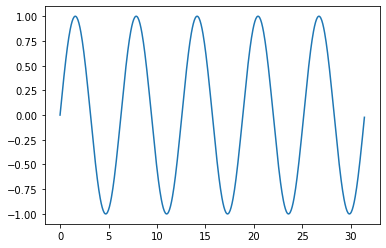

In [17]:
plt.plot(ti_t,phi_t[:,0])

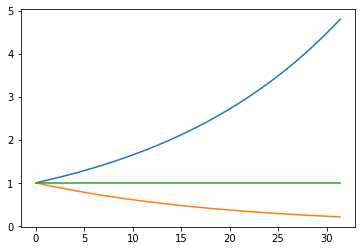

In [18]:
plt.plot(ti_t,phi_e[:,0]**2+phi_e[:,1]**2)
plt.plot(ti_t,phi_i[:,0]**2+phi_i[:,1]**2)
plt.plot(ti_t,phi_t[:,0]**2+phi_t[:,1]**2)

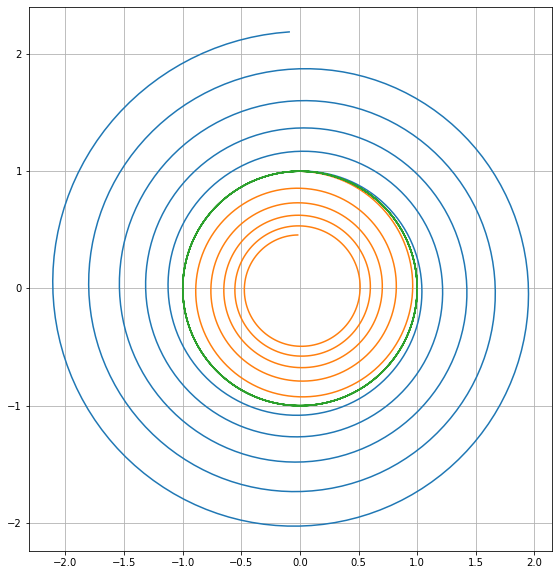

In [19]:
plt.figure(figsize=(10,10))
plt.plot(phi_e[:,0],phi_e[:,1])
plt.plot(phi_i[:,0],phi_i[:,1])
plt.plot(phi_t[:,0],phi_t[:,1])
plt.gca().set_aspect(1)
plt.grid()
plt.show()